<a href="https://colab.research.google.com/github/jlaurant/j/blob/master/dataExploration_rvSept25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSBA 6211 Project

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from matplotlib.pyplot import figure

# The command below means that the output of multiple commands in a cell will be output at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The command below tells jupyter to display up to 80 columns, this keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

# Show figures in notebook
%matplotlib inline
plt.style.use('ggplot')

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Import the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import the training set
df = pd.read_csv('/content/drive/My Drive/6211 - project/pet-adoption-prediction/train/train.csv')

# Check the data

In [0]:
# check the columns of the training set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [0]:
# check the first 5 rows of the training set
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [0]:
df['Type'] = df['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female' if x == 2 else 'Mixed')

# Data Visualization

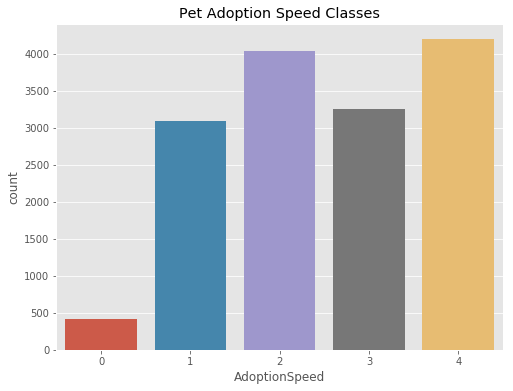

In [0]:
plt.figure(figsize=(8, 6));
sns.countplot(x='AdoptionSpeed',data=df)
plt.title('Pet Adoption Speed Classes');

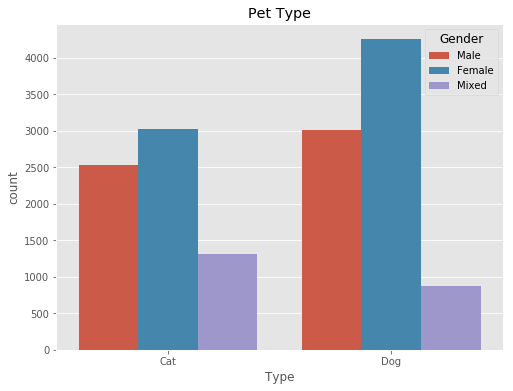

In [0]:
plt.figure(figsize=(8, 6));
sns.countplot(hue='Gender', x='Type',data=df)
plt.title('Pet Type');

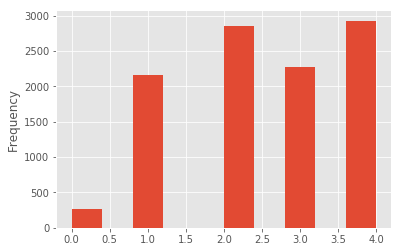

In [0]:
#checking the dist. of outcome variable
y_train.plot('hist')

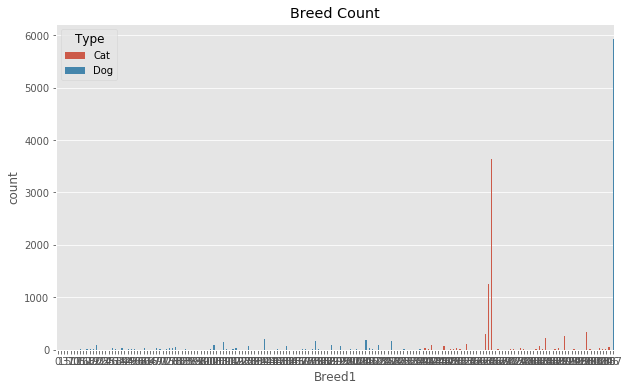

In [0]:
plt.figure(figsize=(10, 6));
sns.countplot(hue='Type', x='Breed1',data=df)
plt.title('Breed Count');

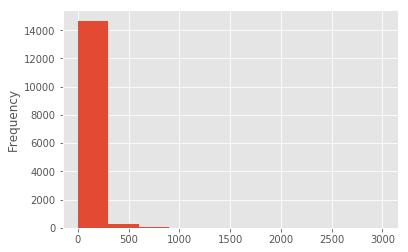

In [0]:
df.Fee.plot('hist')

# Group Breeds

There are too many breed categories. Let's group some of the smaller categories.

In [5]:
df.loc[df['Type'] == 2].Breed1.value_counts().head(10)

266    3634
265    1258
299     342
264     296
292     264
285     221
254     105
243      94
283      73
247      71
Name: Breed1, dtype: int64

In [6]:
df.loc[df['Type'] == 1].Breed1.value_counts().head(10)

307    5923
141     205
205     189
179     167
218     161
109     151
103      98
20       90
213      89
189      88
Name: Breed1, dtype: int64

In [0]:
# create a function to change the uncommon breeds (count < 200) into '999'
def Breed1(df): 
    
    if df.Breed1 not in [266,265,299,264,292,285,307,141]:
        df.Breed1= 999
    else:
        df.Breed1 = df.Breed1
    return df
  
df=df.apply(Breed1, axis=1)

In [8]:
# check the results
df.Breed1.value_counts()

307    5927
266    3634
999    2846
265    1258
299     342
264     296
292     264
285     221
141     205
Name: Breed1, dtype: int64

In [9]:
df.loc[df['Type'] == 2].Breed2.value_counts().head(10)

0      5135
266     599
265     321
299     138
264     125
292     105
285      78
254      42
247      39
243      30
Name: Breed2, dtype: int64

In [10]:
df.loc[df['Type'] == 1].Breed2.value_counts().head(10)

0      5627
307    1727
218      90
141      86
103      55
213      49
189      40
109      39
179      38
205      32
Name: Breed2, dtype: int64

In [0]:
# create a function to change the uncommon breeds into 'others'
def Breed2(df): 
    
    if df.Breed2 not in [0,266,265,307]:
        df.Breed2= 999
    else:
        df.Breed2 = df.Breed2
    return df
  
df=df.apply(Breed2, axis=1)

In [12]:
# check the results
df.Breed2.value_counts()

0      10762
307     1727
999     1584
266      599
265      321
Name: Breed2, dtype: int64

# Data processing

In [0]:
# drop the columns we do not need
df = df.drop(['Name','RescuerID','Description','PetID'], axis=1)

In [0]:
df.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt',
       'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [0]:
df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,2


In [0]:
df[['Fee','Age','VideoAmt','PhotoAmt','Quantity']].describe()

,Fee,Age,VideoAmt,PhotoAmt,Quantity
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,21.259988,10.452078,0.056760,3.889215,1.576069
std,78.414548,18.155790,0.346185,3.487810,1.472477
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,2.000000,1.000000
50%,0.000000,3.000000,0.000000,3.000000,1.000000
75%,0.000000,12.000000,0.000000,5.000000,1.000000
max,3000.000000,255.000000,8.000000,30.000000,20.000000


In [0]:
df.Color1.value_counts()

1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: Color1, dtype: int64

In [0]:
X=df.drop(['AdoptionSpeed','Fee','Age','VideoAmt','PhotoAmt','Quantity'],axis=1)
y=df.AdoptionSpeed

In [15]:
X.dtypes

Type            int64
Breed1          int64
Breed2          int64
Gender          int64
Color1          int64
Color2          int64
Color3          int64
MaturitySize    int64
FurLength       int64
Vaccinated      int64
Dewormed        int64
Sterilized      int64
Health          int64
State           int64
dtype: object

In [0]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
X_cat=enc.fit_transform(X).toarray()

In [17]:
df2  = df[['Age','Quantity','Fee','VideoAmt','PhotoAmt',]].as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
X=np.concatenate([X_cat, df2], axis=1)

In [0]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [20]:
X.shape

(14993, 77)

In [21]:
y.array.shape

(14993,)

In [0]:
from scipy import stats
stats.describe(X)

DescribeResult(nobs=14993, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])), mean=array([5.42386447e-01, 4.57613553e-01, 1.36730474e-02, 1.97425465e-02,
       8.39058227e-02, 2.42379777e-01, 1.47402121e-02, 1.76082172e-02,
       2.28106450e-02, 3.95317815e-01, 1.89821917e-01, 7.17801641e-01,
       2.14099913e-02, 3.99519776e-02, 1.15187087e-01, 1

In [0]:
# Get training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=37)

# Random Forest 
accuracy = 39.62%

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=100,  random_state=42)
rfr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [0]:
print('Accuracy score for the current model is', accuracy_score(y_test, rfr.predict(X_test))*100)

Accuracy score for the current model is 39.817696754112944


# Neural Network

In [0]:
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [0]:
ncol=X_train.shape[1]
act='tanh'
num=30
nn1 = Sequential()
nn1.add(Dense(num,activation=act, input_shape = (ncol,)))
nn1.add(Dropout(0.2))
nn1.add(Dense(num, activation=act))
nn1.add(Dropout(0.2))
nn1.add(Dense(num, activation=act))
nn1.add(Dense(5, activation='softmax')) 
nn1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
nn1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                1890      
_________________________________________________________________
dropout_7 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 155       
Total params: 3,905
Trainable params: 3,905
Non-trainable params: 0
____________________________________________________

In [0]:
history=nn1.fit(X_train,
                    y_train_cat,
                    epochs=60,
                    batch_size=10,
                    validation_data=(X_test, y_test_cat))

Train on 10495 samples, validate on 4498 samples
Epoch 1/60
10495/10495 [==============================] - 6s 612us/step - loss: 1.3830 - acc: 0.3717 - val_loss: 1.3832 - val_acc: 0.3659
Epoch 2/60
10495/10495 [==============================] - 6s 617us/step - loss: 1.3875 - acc: 0.3665 - val_loss: 1.3859 - val_acc: 0.3535
Epoch 3/60
10495/10495 [==============================] - 6s 605us/step - loss: 1.3805 - acc: 0.3720 - val_loss: 1.3822 - val_acc: 0.3713
Epoch 4/60
10495/10495 [==============================] - 6s 619us/step - loss: 1.3838 - acc: 0.3745 - val_loss: 1.3885 - val_acc: 0.3579
Epoch 5/60
10495/10495 [==============================] - 6s 614us/step - loss: 1.3830 - acc: 0.3678 - val_loss: 1.3823 - val_acc: 0.3708
Epoch 6/60
10495/10495 [==============================] - 7s 620us/step - loss: 1.3830 - acc: 0.3789 - val_loss: 1.3826 - val_acc: 0.3606
Epoch 7/60
10495/10495 [==============================] - 7s 636us/step - loss: 1.3787 - acc: 0.3768 - val_loss: 1.3784 - v

Text(0.5, 1.0, 'Training and test accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

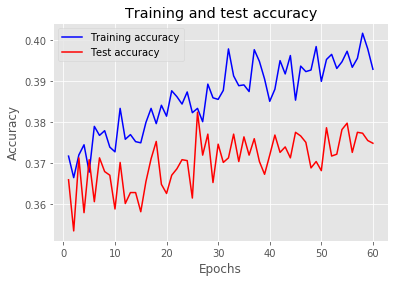

In [0]:
# get the learning curve
loss = history.history['acc']
val_loss = history.history['val_acc']
epochs = range(1, len(loss) + 1);
plt.plot(epochs, loss, 'b', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# XGBoost

In [0]:
from xgboost.sklearn import XGBClassifier 
# fit model to training data
xgb_model = XGBClassifier().fit(X_train, y_train)

In [0]:
print('Accuracy score for the current model is', accuracy_score(y_test, xgb_model.predict(X_test))*100)

Accuracy score for the current model is 40.706980880391285


In [0]:
confusion_matrix(y_test, xgb_model.predict(X_test),labels=[0,1,2,3,4])

array([[  1,  40,  28,   7,  32],
       [  0, 264, 367,  49, 219],
       [  0, 243, 527, 127, 364],
       [  0, 138, 333, 179, 310],
       [  0, 101, 244,  65, 860]])

In [0]:
y_test.value_counts()

4    1270
2    1261
3     960
1     899
0     108
Name: AdoptionSpeed, dtype: int64

# text analysis

In [0]:
df = pd.read_csv('/content/drive/My Drive/6211 - project/pet-adoption-prediction/train/train.csv')
text_data = df.Description

In [23]:
text_data.head(20)

0     Nibble is a 3+ month old ball of cuteness. He ...
1     I just found it alone yesterday near my apartm...
2     Their pregnant mother was dumped by her irresp...
3     Good guard dog, very alert, active, obedience ...
4     This handsome yet cute boy is up for adoption....
5     This is a stray kitten that came to my house. ...
6     anyone within the area of ipoh or taiping who ...
7     Siu Pak just give birth on 13/6/10 to 6puppies...
8     healthy and active, feisty kitten found in nei...
9     Very manja and gentle stray cat found, we woul...
10    For serious adopter, please do sms or call for...
11    Kali is a super playful kitten who is on the g...
12    Peanut was an abused puppy until he was rescue...
13    Hi Pet Lovers! This is my first posting and I ...
14    Lost Dog Found (Bandar Menjalara, Kepong／Taman...
15    We moved out of our apartment to a landed home...
16              to be spayed on /12 adorable & friendly
17    shes active... she can obey wht command th

In [24]:
text=text_data.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
clean_text=[]
for line in text:
  clean_text.append(str(line))

In [0]:
#!pip install langdetect
lang=[]
for line in text_data:
  lang.append(detect(str(line)))

In [0]:
lang.count('en')

14176

In [82]:
# preprocessing text data
from keras.preprocessing.text import Tokenizer
# tokenize the most often 150 words
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(clean_text)
word_index = tokenizer.word_index
# convert descriptions into matrix
clean_text=tokenizer.texts_to_matrix(clean_text,mode='binary')
print('Found %s unique tokens.' % len(word_index))

Found 21808 unique tokens.


In [39]:
y_cat.shape

(14993, 150)

In [0]:
# separating training sets and test sets
num1, num2, txt1, txt2, labels1, labels2 = train_test_split(
    X, clean_text, y, test_size=0.30, random_state=42)
# Getting the number of features
ncol=X.shape[1]

In [0]:
labels1_cat = to_categorical(labels1)
labels2_cat = to_categorical(labels2)

In [0]:
# First working on the text part
from keras.layers import *
from keras.models import *

# Description input: meant to receive sequences of 150 integers
# Naming this layer by passing it a "name" argument.
text_input = Input(shape=(150,), dtype='int32', name='text_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=150)(text_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)

In [0]:
# Output of using description to predict price
text_output = Dense(5, activation='softmax', name='text_output')(lstm_out)

In [0]:
# Then adding in the non-text part
num_input = Input(shape=(ncol,), name='num_input')
x = Concatenate(axis=-1)([lstm_out, num_input])
act = 'tanh'
# Stacking a deep densely-connected network on top
x = Dense(30, activation=act)(x)
x = Dropout(0.2)(x)
x = Dense(30, activation=act)(x)
x = Dropout(0.2)(x)
x = Dense(30, activation=act)(x)

# And finally adding the main fitting output
main_output = Dense(5, activation='softmax', name='main_output')(x)

In [0]:
# Putting the model together with two inputs and one outputs
nn2 = Model(inputs=[text_input, num_input], outputs=[main_output, text_output])

In [76]:
# Compiling and fitting the neural network
# Since we have more inputs, I changed the batch size into 100.
nn2.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['categorical_accuracy'],
              loss_weights=[1., 0.001])
history_nn2=nn2.fit([txt1, num1], [labels1_cat, labels1_cat],
                  epochs=8, batch_size=100, 
                  validation_data=([txt2, num2], [labels2_cat, labels2_cat]))

Train on 10495 samples, validate on 4498 samples
Epoch 1/8
10495/10495 [==============================] - 40s 4ms/step - loss: 1.4319 - main_output_loss: 1.4304 - text_output_loss: 1.4800 - main_output_categorical_accuracy: 0.3331 - text_output_categorical_accuracy: 0.2751 - val_loss: 1.4117 - val_main_output_loss: 1.4103 - val_text_output_loss: 1.4814 - val_main_output_categorical_accuracy: 0.3522 - val_text_output_categorical_accuracy: 0.2617
Epoch 2/8
10495/10495 [==============================] - 39s 4ms/step - loss: 1.4220 - main_output_loss: 1.4206 - text_output_loss: 1.4653 - main_output_categorical_accuracy: 0.3397 - text_output_categorical_accuracy: 0.2818 - val_loss: 1.4050 - val_main_output_loss: 1.4036 - val_text_output_loss: 1.4753 - val_main_output_categorical_accuracy: 0.3586 - val_text_output_categorical_accuracy: 0.2819
Epoch 3/8
10495/10495 [==============================] - 38s 4ms/step - loss: 1.4091 - main_output_loss: 1.4077 - text_output_loss: 1.4644 - main_outpu